In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

#### Reading Data 

In [2]:
random.sample(os.listdir('dogs_vs_cats/train/cats'), 5)

['cat.1977.jpg',
 'cat.10009.jpg',
 'cat.8990.jpg',
 'cat.1405.jpg',
 'cat.3603.jpg']

In [12]:
cats_train_size = len(os.listdir('dogs_vs_cats/train/cats'))
print (f"Train cats size : {cats_train_size}")

dogs_train_size = len(os.listdir('dogs_vs_cats/train/cats'))
print (f"Train cats size : {dogs_train_size}")

cats_test_size = len(os.listdir('dogs_vs_cats/test/cats'))
print (f"Test cats size : {cats_test_size}")

dogs_test_size = len(os.listdir('dogs_vs_cats/test/cats'))
print (f"Test cats size : {dogs_test_size}")


Train cats size : 10000
Train cats size : 10000
Test cats size : 2500
Test cats size : 2500


In [6]:
def plot_images_from_directory(directory_path, class_animal, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)

    # Plotting the images
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Adjust the size as needed
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_animal}")
        axes[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

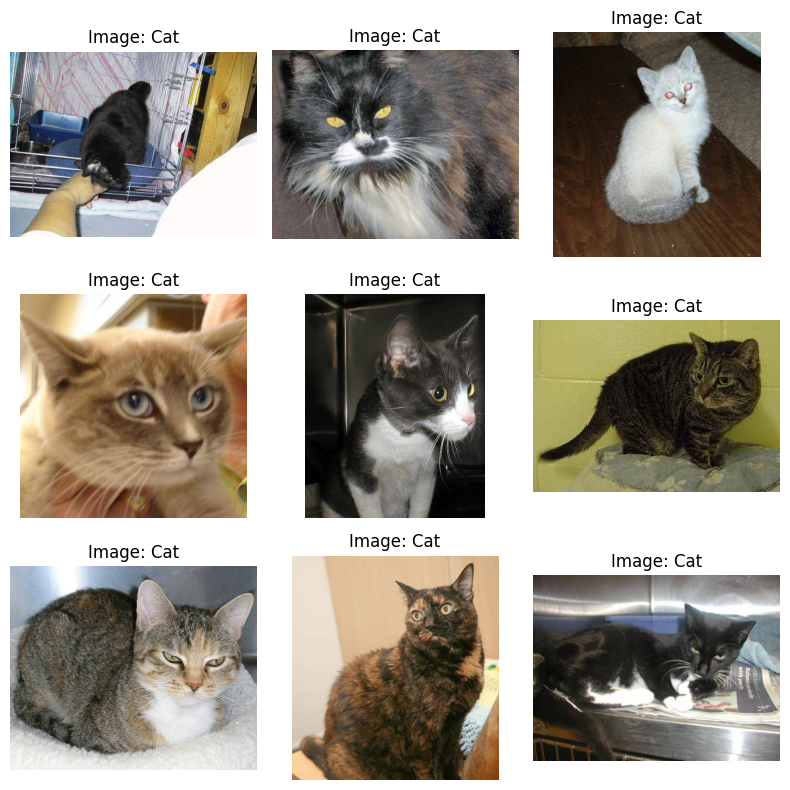

In [7]:
# Placeholder for the directory path
cat_directory_path = 'dogs_vs_cats/train/cats'  # Replace with your directory path
plot_images_from_directory(cat_directory_path, class_animal = 'Cat')

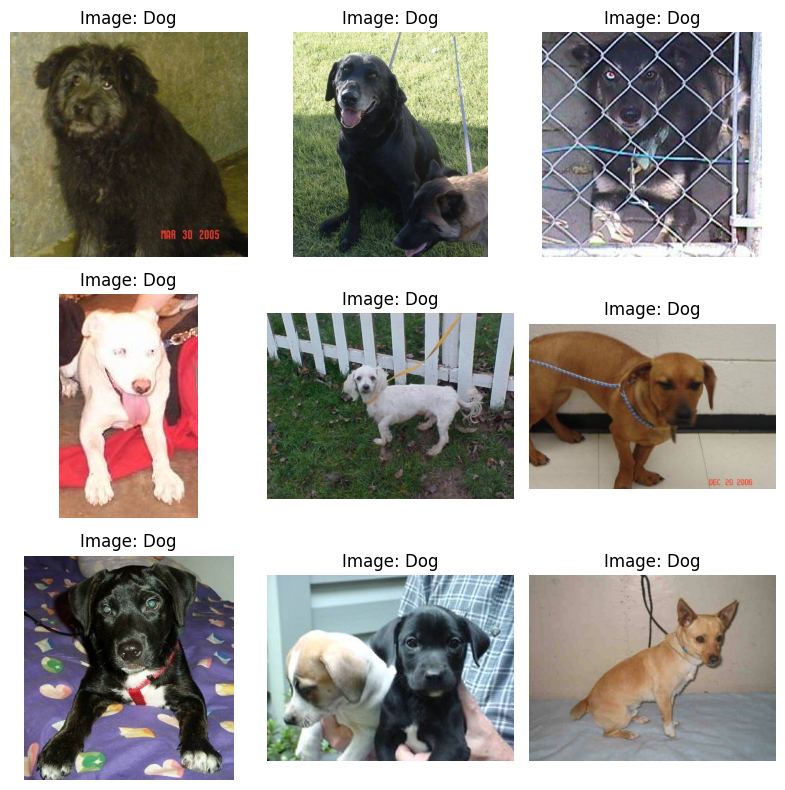

In [8]:
# Placeholder for the directory path
dog_directory_path = 'dogs_vs_cats/train/dogs'  # Replace with your directory path
plot_images_from_directory(dog_directory_path, class_animal = 'Dog')

#### Data Analysis

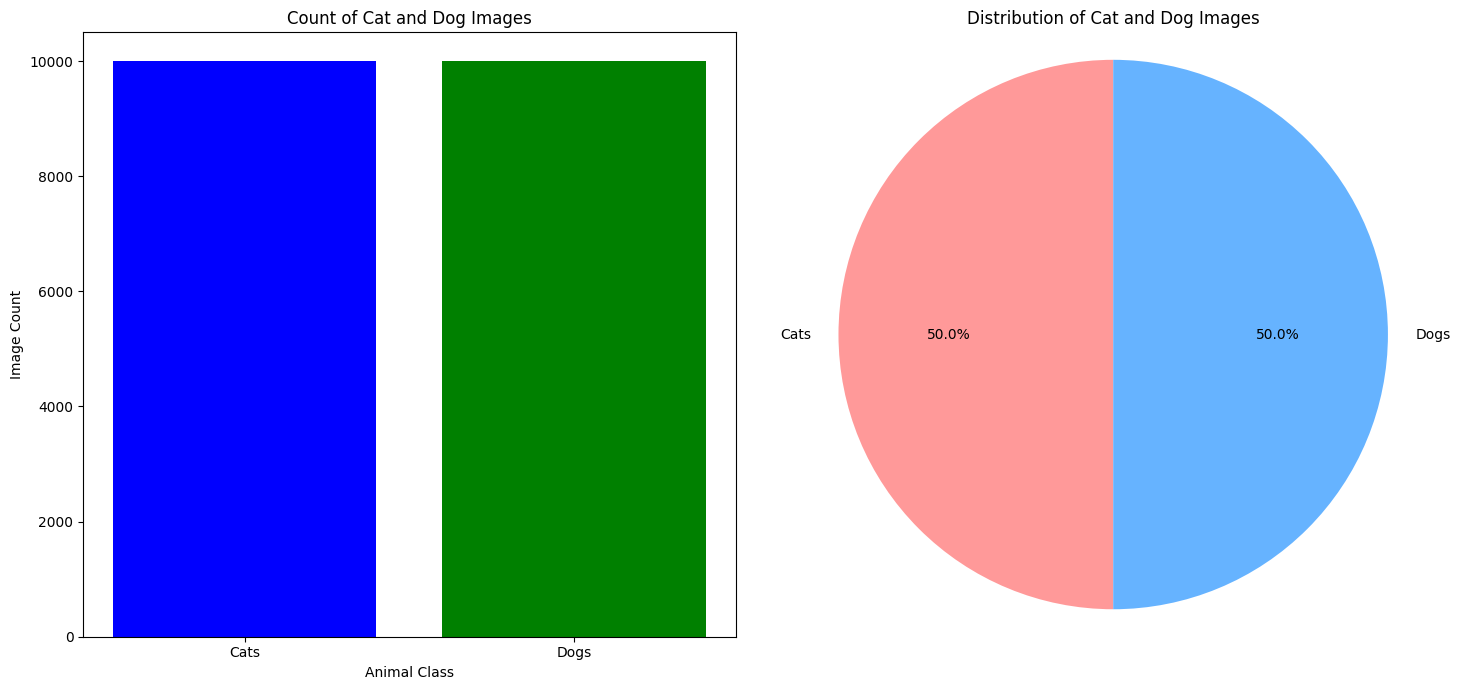

In [10]:
# Creating both a bar chart and a pie chart side by side in a single figure
cat_images = os.listdir(cat_directory_path)
dog_images = os.listdir(dog_directory_path)

classes_animals = ['Cats', 'Dogs']
count = [len(cat_images), len(dog_images)] 


# Setting up a figure and axes for two subplots: one for the bar chart, one for the pie chart
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Bar chart on the first subplot
ax[0].bar(classes_animals, count, color=['blue', 'green'])
ax[0].set_xlabel('Animal Class')
ax[0].set_ylabel('Image Count')
ax[0].set_title('Count of Cat and Dog Images')

# Pie chart on the second subplot
colors = ['#ff9999','#66b3ff']
ax[1].pie(count, labels=classes_animals, colors=colors, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Distribution of Cat and Dog Images')
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout so that both subplots fit nicely
plt.tight_layout()
plt.show()


#### Removing Corrupted Images

In [11]:
import os
import cv2
import imghdr

# Define the list of acceptable image extensions
image_exts = ['jpeg', 'jpg', 'png']

# Path to the directory containing image classes and possibly other nested subdirectories
data_dir = 'dogs_vs_cats/test/cats'

# Walk through all directories and files in the dataset
for root, dirs, files in os.walk(data_dir):
    for file in files:
        # Construct the path to the current file
        file_path = os.path.join(root, file)

        try:
            # Check the file type of the current file
            file_type = imghdr.what(file_path)

            # If the file extension is not in the allowed list, remove it
            if file_type not in image_exts:
                print(f'Image not in ext list {file_path}')
                os.remove(file_path)
            else:
                # Proceed to process the image if needed, for example, reading it with OpenCV
                img = cv2.imread(file_path)

        except Exception as e:
            # Print out the issue and the path of the problematic file
            print(f'Issue with file {file_path}. Error: {e}')
            # Optionally, remove files that cause exceptions
            os.remove(file_path)

C:\Users\NISHCHAL_PUNIYANI\AppData\Local\Temp\ipykernel_15088\3724549794.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


### Loading Shapes and Channels

In [13]:
import numpy as np
from PIL import Image

def image_to_array(image_path):
    """
    Read an image and convert it to a numpy array.

    Parameters:
    image_path (str): The path to the image file.

    Returns:
    np.array: The image as a numpy array.
    """
    try:
        with Image.open(image_path) as img:
            image_array = np.array(img)
            return image_array
    except IOError:
        print(f"Could not read the image file at {image_path}.")
        return None

In [14]:
image_to_array("dogs_vs_cats/train/cats/cat.2.jpg")

array([[[ 65,  53,  53],
        [ 67,  55,  55],
        [ 48,  36,  36],
        ...,
        [147, 142, 123],
        [133, 126, 108],
        [110, 103,  85]],

       [[ 57,  42,  45],
        [ 63,  48,  51],
        [ 56,  41,  44],
        ...,
        [175, 170, 151],
        [143, 136, 118],
        [ 99,  92,  74]],

       [[ 89,  72,  80],
        [ 78,  61,  69],
        [ 54,  37,  45],
        ...,
        [167, 160, 142],
        [148, 139, 122],
        [110, 101,  84]],

       ...,

       [[149, 142, 150],
        [114, 107, 115],
        [ 68,  58,  66],
        ...,
        [ 72,  61,  65],
        [168, 158, 159],
        [211, 201, 199]],

       [[146, 139, 146],
        [114, 107, 114],
        [ 70,  60,  68],
        ...,
        [128, 116, 118],
        [197, 185, 185],
        [222, 211, 207]],

       [[143, 136, 143],
        [115, 108, 115],
        [ 72,  62,  70],
        ...,
        [173, 161, 163],
        [209, 198, 196],
        [215, 204, 200]]

In [15]:
# Set path to the dataset
base_dir = 'dogs_vs_cats/train'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [16]:
# Using 20% of data for validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resizing images to 150x150
    batch_size=20,
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation')  # Set as validation data

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


### Getting Class Labels

In [17]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print("Training class labels:", train_class_labels)

# Accessing class labels for the validation data
validation_class_labels = validation_generator.class_indices
print("Validation class labels:", validation_class_labels)

Training class labels: {'cats': 0, 'dogs': 1}
Validation class labels: {'cats': 0, 'dogs': 1}


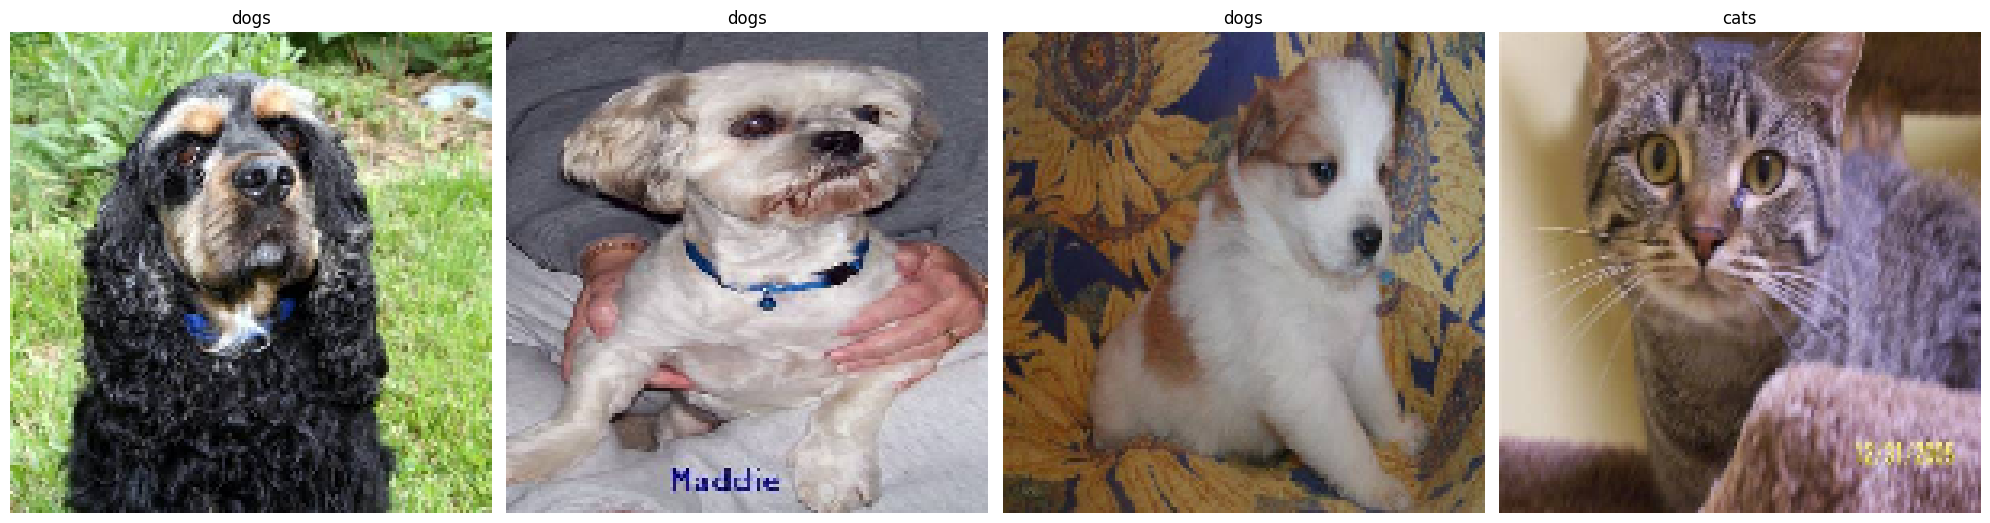

In [19]:
import matplotlib.pyplot as plt

# Function to plot images and their labels
def plot_images_from_generator(generator, num_images=4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(20,20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        # Image preprocessing might differ, adjust accordingly
        ax.imshow(img)
        # Set the title to the class label
        # Inverse the class indices dictionary to get class names from labels
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Now, call this function with your training generator
plot_images_from_generator(train_generator, num_images=4)

In [20]:
train_generator.reset()

### Basic CNN Model

In [21]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

d:\DeepLearning\CatVsDogs\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

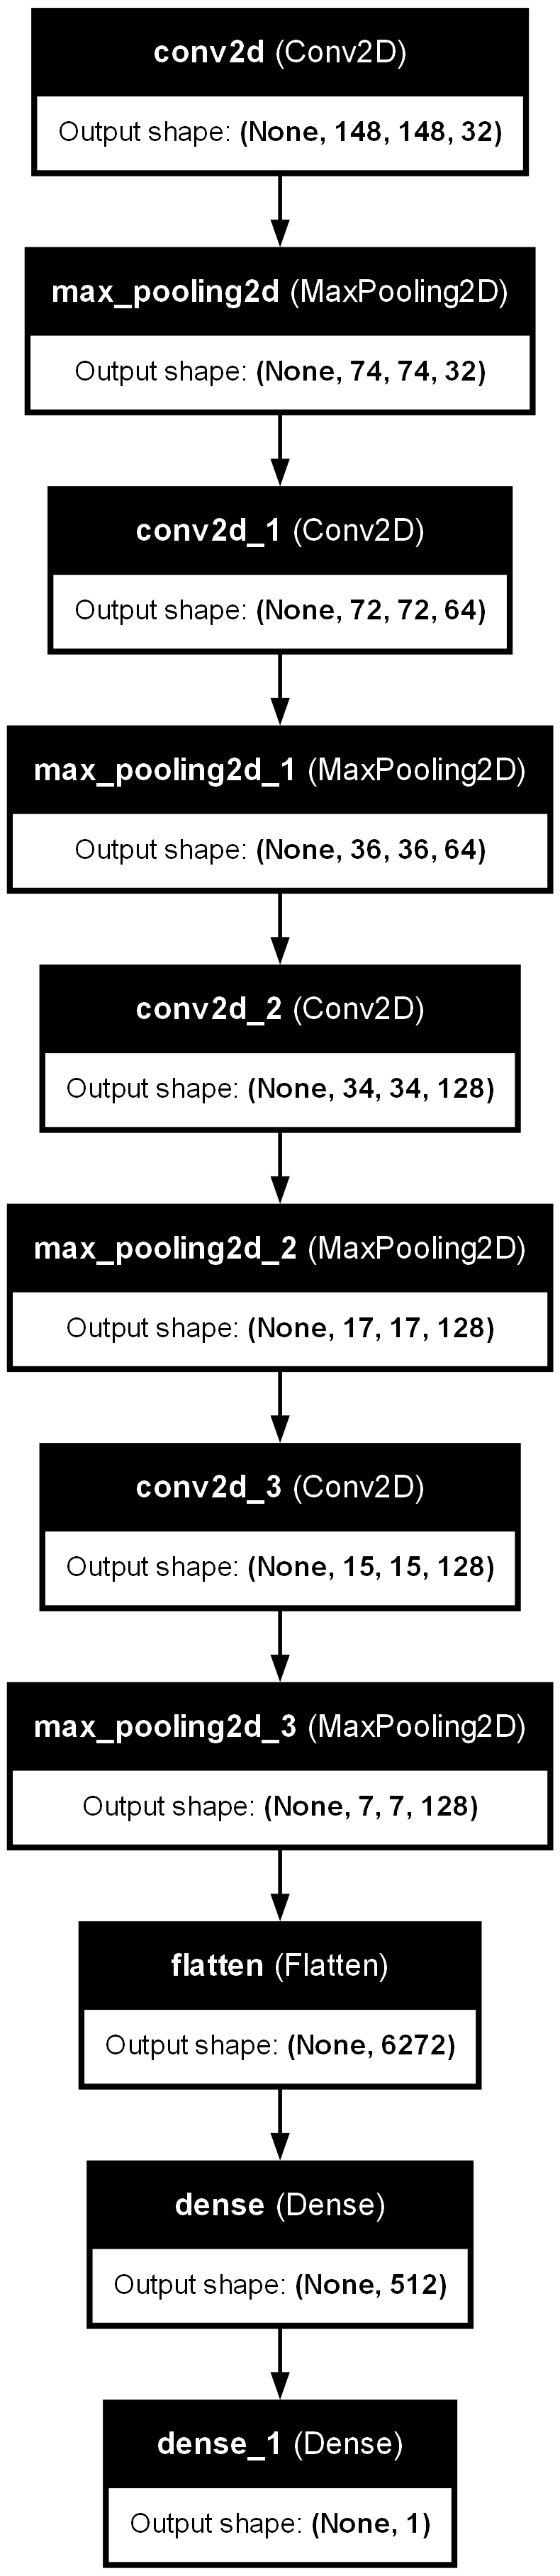

In [22]:
plot_model(model, to_file = 'model_arch.png',
            show_shapes=True, show_layer_names=True)

## Parameter Calculation in CNN Layers

### Conv2D Layer

The formula to calculate the number of parameters in a Conv2D layer is:

$$\text{Parameters} = (\text{kernel\_height} \times \text{kernel\_width} \times \text{input\_channels} + 1) \times \text{number\_of\_filters}$$

The "+1" accounts for the bias term for each filter.

#### 1. First Conv2D Layer

- Input shape: (150, 150, 3)
- Number of filters: 32
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 3 + 1) \times 32 = 896$$

#### 2. Second Conv2D Layer

- Input channels: 32 (from the previous Conv2D layer)
- Number of filters: 64
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 32 + 1) \times 64 = 18,496$$

#### 3. Third Conv2D Layer

- Input channels: 64
- Number of filters: 128
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 64 + 1) \times 128 = 73,856$$

#### 4. Fourth Conv2D Layer

- Input channels: 128
- Number of filters: 128
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 128 + 1) \times 128 = 147,584$$

### MaxPooling2D Layer

MaxPooling layers do not have parameters; they only reduce the size of the input they're applied to, based on their pool size and stride.

### Flatten Layer

The Flatten layer itself doesn't have parameters. It simply reshapes the input but does not affect the total parameter count.

### Dense Layer

The formula for a Dense (fully connected) layer is:

$$\text{Parameters} = (\text{input\_size} + 1) \times \text{output\_size}$$

#### 1. First Dense Layer

- Assuming Flatten output size: X (you'll need to calculate this based on the output of the last pooling layer).
- Output size: 512
- Parameters: $$(X + 1) \times 512$$

#### 2. Second Dense Layer

- Input size: 512
- Output size: 1 (for binary classification)
- Parameters: $$(512 + 1) \times 1 = 513$$


In [24]:
model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [25]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples / batch)
print(train_steps, validation_steps_per_epoch)

800.0 200.0


In [30]:
history = model.fit(
                    train_generator,
                    steps_per_epoch=800,
                    epochs=6,
                    validation_data=validation_generator,
                    validation_steps=200)

Epoch 1/6
800/800 ━━━━━━━━━━━━━━━━━━━━ 446s 557ms/step - accuracy: 0.7192 - loss: 0.5523 - val_accuracy: 0.7530 - val_loss: 0.5011
Epoch 2/6
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 38us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/6


C:\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


800/800 ━━━━━━━━━━━━━━━━━━━━ 515s 643ms/step - accuracy: 0.7921 - loss: 0.4459 - val_accuracy: 0.8100 - val_loss: 0.4148
Epoch 4/6
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 43us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/6
800/800 ━━━━━━━━━━━━━━━━━━━━ 447s 559ms/step - accuracy: 0.8372 - loss: 0.3711 - val_accuracy: 0.8095 - val_loss: 0.4075
Epoch 6/6
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 37us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


In [32]:
history

In [33]:
history.history

{'accuracy': [0.7325000166893005,
  0.0,
  0.7948750257492065,
  0.0,
  0.8331875205039978,
  0.0],
 'loss': [0.5299742221832275,
  0.0,
  0.44141972064971924,
  0.0,
  0.37666961550712585,
  0.0],
 'val_accuracy': [0.753000020980835,
  0.0,
  0.8100000023841858,
  0.0,
  0.809499979019165,
  0.0],
 'val_loss': [0.5010871887207031,
  0.0,
  0.41477105021476746,
  0.0,
  0.4074786305427551,
  0.0]}

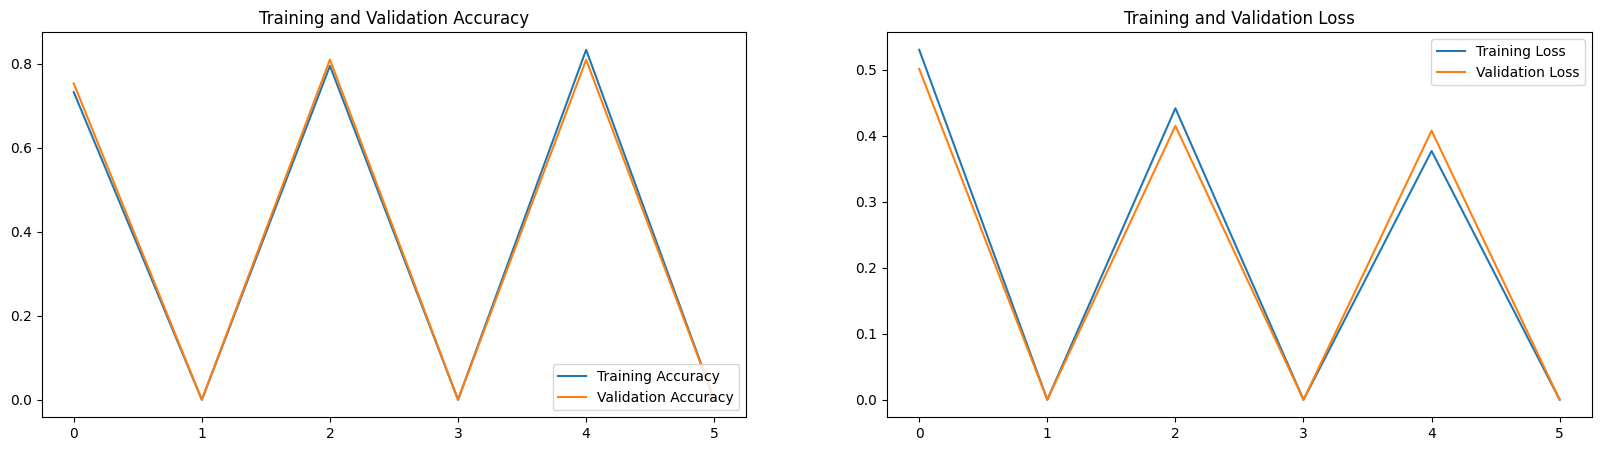

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Model Evluation

#### Initiating Test Generator

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

test_dir = 'dogs_vs_cats/test'  # Path to your test directory

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Should match the input size of your network
    batch_size=20,  # Can adjust based on your memory constraints
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    shuffle=False)  # No need to shuffle test data